<a href="https://colab.research.google.com/github/meme0134/MathPerception/blob/main/MathPerception_20250414.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 1：安装和导入库
!pip install praw
!pip install bertopic
!pip install nltk
!pip install vaderSentiment
!pip install -U sentence-transformers


In [4]:
#2：列出已安装库（可选）
import praw
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from bertopic import BERTopic
import matplotlib.pyplot as plt

nltk.download("punkt")
nltk.download("stopwords")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
# 3：抓取 Reddit 数据（仅近5年内，包含 title、正文、自带评论）

import praw
import pandas as pd
import time
from datetime import datetime

# 初始化 Reddit API
reddit = praw.Reddit(
    client_id="D7jV133THru3cEHpEvhCKQ",
    client_secret="C5VA2Vbv51bRainAcoUf7vRMnRlqfA",
    user_agent="math-crawler by zoey"
)

# 设置目标 Subreddit 和帖子数量
subreddit_name = "learnmath"
limit = 500
data = []

# 当前时间与5年前的时间戳
now = time.time()
five_years_ago = now - 5 * 365 * 24 * 60 * 60  # 5年秒数

# 遍历帖子（hot 排序，你也可以改为 .new）
for submission in reddit.subreddit(subreddit_name).hot(limit=limit):

    # ✅ 跳过5年前的帖子
    if submission.created_utc < five_years_ago:
        continue

    submission.comments.replace_more(limit=0)
    for comment in submission.comments:
        data.append({
            "post_title": submission.title,
            "post_content": submission.selftext,
            "comment": comment.body,
            "created_utc": submission.created_utc,
            "created_date": datetime.utcfromtimestamp(submission.created_utc).strftime('%Y-%m-%d')
        })

# 创建 DataFrame
# df = pd.DataFrame(data)
df_reddit = pd.DataFrame(data)

# 保存为 CSV 文件（可选）
df.to_csv("reddit_comments_recent5years.csv", index=False)

# 查看前几行
df.head()

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

,post_title,post_content,comment,created_utc,created_date
0,[Megathread] Post your favorite (or your own) ...,Due to a bunch of people posting their channel...,[3Blue1Brown - YouTube](https://www.youtube.co...,1.610528e+09,2021-01-13
1,[Megathread] Post your favorite (or your own) ...,Due to a bunch of people posting their channel...,I just google the best books on a topic and do...,1.610528e+09,2021-01-13
2,[Megathread] Post your favorite (or your own) ...,Due to a bunch of people posting their channel...,"Since moving online, I have made videos for my...",1.610528e+09,2021-01-13
3,[Megathread] Post your favorite (or your own) ...,Due to a bunch of people posting their channel...,The Math Sorcerer on youtube is a great motivator,1.610528e+09,2021-01-13
4,[Megathread] Post your favorite (or your own) ...,Due to a bunch of people posting their channel...,Shameless plug of my drag-and-drop math app [M...,1.610528e+09,2021-01-13


In [125]:
# 从twitter抓取---抓不到，也没抓comments

# ✅ 安装 snscrape CLI 工具
!pip install -q snscrape

# ✅ 用 shell 命令调用 snscrape，保存为 jsonl 文件
!snscrape --jsonl --max-results 1000 --since 2023-01-01 twitter-search "math OR mathematics lang:en until:2023-12-31" > twitter_raw.json

# ✅ 读取 jsonl 文件到 DataFrame
import pandas as pd
import json

tweets = []
with open("twitter_raw.json", "r") as f:
    for line in f:
        tweet = json.loads(line)
        tweets.append({
            "post_title": "",  # Twitter 没有 title
            "post_content": tweet["content"],
            "comment": "",     # 暂不抓回复
            "created_date": tweet["date"][:10]  # 取前10位变成 YYYY-MM-DD
        })

df_twitter = pd.DataFrame(tweets)
df_twitter.to_csv("twitter_math.csv", index=False)
df_twitter.head()

2025-04-15 20:39:37.198  ERROR  snscrape.base  Error retrieving https://twitter.com/search?f=live&lang=en&q=math+OR+mathematics+lang%3Aen+until%3A2023-12-31&src=spelling_expansion_revert_click: SSLError(MaxRetryError("HTTPSConnectionPool(host='twitter.com', port=443): Max retries exceeded with url: /search?f=live&lang=en&q=math+OR+mathematics+lang%3Aen+until%3A2023-12-31&src=spelling_expansion_revert_click (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1016)')))"))
2025-04-15 20:39:37.198  CRITICAL  snscrape.base  4 requests to https://twitter.com/search?f=live&lang=en&q=math+OR+mathematics+lang%3Aen+until%3A2023-12-31&src=spelling_expansion_revert_click failed, giving up.
2025-04-15 20:39:37.198  CRITICAL  snscrape.base  Errors: SSLError(MaxRetryError("HTTPSConnectionPool(host='twitter.com', port=443): Max retries exceeded with url: /search?f=live&lang=en&q=math+OR+mathematics+

""


In [127]:
df_twitter.head(10)

,source,post_title,post_content,comment,created_date


In [126]:
#为df添加source来源

# ✅ 为 Reddit 数据加来源标签
df_reddit["source"] = "Reddit"

# ✅ 为 Twitter 数据加来源标签
df_twitter["source"] = "Twitter"

# ✅ （未来）为 YouTube 数据预留结构
# df_youtube["source"] = "YouTube"

# ✅ 统一列格式（如需可加入 post_id）
standard_cols = ["post_title", "post_content", "comment", "created_date", "source"]

# ✅ 确保所有平台数据都有这些列（即使是空的）
for df_partial in [df_reddit, df_twitter]:  # , df_youtube
    for col in standard_cols:
        if col not in df_partial.columns:
            df_partial[col] = ""

# ✅ 合并所有来源的数据，并直接命名为 df，后续无需改名
df = pd.concat([df_reddit, df_twitter], ignore_index=True)  # , df_youtube

In [111]:
# 第5步：文本预处理（统一命名为 post_title + post_content）

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# 下载必要资源
nltk.download("punkt")
nltk.download("stopwords")

# 初始化工具
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def preprocess(text):
    words = word_tokenize(str(text).lower())
    words = [stemmer.stem(w) for w in words if w.isalpha() and w not in stop_words]
    return " ".join(words)

# ✅ 清洗字段
df["cleaned_title"] = df["post_title"].astype(str).apply(preprocess)
df["cleaned_content"] = df["post_content"].astype(str).apply(preprocess)
df["cleaned_comment"] = df["comment"].astype(str).apply(preprocess)

# ✅ 合并原始与清洗后的字段
df["title_and_content"] = df["post_title"].fillna('') + " " + df["post_content"].fillna('')
df["cleaned_title_and_content"] = df["cleaned_title"] + " " + df["cleaned_content"]

# 保存清洗结果
df.to_csv("reddit_cleaned.csv", index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
title_texts = df["cleaned_title"].tolist()
topic_model_title = BERTopic()
title_topics, _ = topic_model_title.fit_transform(title_texts)
df["title_topic"] = title_topics   # ✅ 加上这一行，解决问题！
df.to_csv("reddit_with_title_topics.csv", index=False)


In [113]:
#筛选与数学表征相关的帖子title和content
from sentence_transformers import SentenceTransformer, util
import torch

# 初始化 SBERT 模型
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

# 定义用于筛选的语义查询语句（建议用社会+个人视角混合）
queries = [
    "how mathematics is represented in media",
    "attitude towards mathematics in society",
    "stereotypes about math and mathematicians",
    "math is hard or boring",
    "social perception of mathematics"
]

# Step 1️⃣：从 df 中提取唯一的帖子（每个 title + content 保留一次）
df_posts = df[['post_title', 'post_content']].drop_duplicates().reset_index(drop=True)
df_posts['title_and_content'] = df_posts['post_title'].fillna('') + " " + df_posts['post_content'].fillna('')

# Step 2️⃣：编码查询语句向量
query_embeddings = sbert_model.encode(queries, convert_to_tensor=True)

# Step 3️⃣：编码每个帖子文本
post_embeddings = sbert_model.encode(
    df_posts['title_and_content'].tolist(),
    convert_to_tensor=True,
    show_progress_bar=True
)

# Step 4️⃣：计算每个帖子与 query 的最大相似度
cos_scores = util.cos_sim(post_embeddings, query_embeddings)
max_scores, _ = torch.max(cos_scores, dim=1)

# Step 5️⃣：设置阈值进行筛选（比如 0.3）
threshold = 0.3
df_posts['sbert_similarity'] = max_scores.cpu().numpy()
df_posts_filtered = df_posts[df_posts['sbert_similarity'] >= threshold].reset_index(drop=True)

# 重新从 df 中把清洗后的列补回 df_posts_filtered
df_cleaned = df[['post_title', 'cleaned_title', 'cleaned_content']].drop_duplicates()
df_posts_filtered = df_posts_filtered.merge(df_cleaned, on='post_title', how='left')

# 重新生成 cleaned_title_and_content
df_posts_filtered['cleaned_title_and_content'] = df_posts_filtered['cleaned_title'] + ' ' + df_posts_filtered['cleaned_content']

from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# 初始化 BERTopic 模型（你可以自定义参数）
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")
topic_model = BERTopic(
    vectorizer_model=vectorizer_model,
    language="english",
    min_topic_size=5,  # 默认是10，咱改小
    calculate_probabilities=True
)
# 对清洗后的帖子文本进行建模
texts = df_posts_filtered["cleaned_title_and_content"].tolist()
topics, probs = topic_model.fit_transform(texts)

# 将结果加入原 dataframe
df_posts_filtered["representation_topic"] = topics

print(f"原始帖子数: {len(df_posts)}，筛选后保留: {len(df_posts_filtered)}")


Batches:   0%|          | 0/15 [00:00<?, ?it/s]

原始帖子数: 458，筛选后保留: 49


In [114]:
# 关联主题与评论

# ✅ Step 8: 回溯评论数据（匹配保留下来的帖子标题）
filtered_titles = df_posts_filtered['post_title'].unique()
df_filtered = df[df['post_title'].isin(filtered_titles)].reset_index(drop=True)

# ✅ ✅ 先过滤掉无效评论
df_filtered = df_filtered.dropna(subset=["cleaned_comment"])

# ✅ Step 9: 情绪分析（使用 NLTK VADER）
analyzer = SentimentIntensityAnalyzer()
df_filtered["sentiment_score"] = df_filtered["cleaned_comment"].apply(
    lambda x: analyzer.polarity_scores(str(x))["compound"]
)

# ✅ 去掉没有评论或没有情绪分的行（防止画图出错）
df_filtered = df_filtered.dropna(subset=["cleaned_comment", "sentiment_score"])

# ✅ STEP 10: 从主题建模结果中提取 representation_topic
titles_df = df_posts_filtered[["post_title", "representation_topic"]].drop_duplicates()

# ✅ STEP 11: 合并评论数据和帖子主题编号（必须用打好情绪分的 df_filtered）
merged_df = df_filtered.merge(titles_df, on="post_title", how="left")

# ✅ STEP 12: 只保留聚类成功的（非 -1）数据
final_df = merged_df[merged_df["representation_topic"] != -1].copy()


# ✅ Step 5：清理和调整 final_df 的列结构

# 删除重复列 title_topic（如果还有）
final_df = final_df.drop(columns=["title_topic"], errors="ignore")

# 重命名 cleaned_title_and_content → clean_representation
final_df = final_df.rename(columns={"cleaned_title_and_content": "cleaned_representation"})

# 把这几个列放到最后，论文结构更清晰
cols_to_move = [
    "cleaned_representation",
    "representation_topic",
    "cleaned_comment",
    "sentiment_score"
]
other_cols = [col for col in final_df.columns if col not in cols_to_move]
final_df = final_df[other_cols + cols_to_move]

# ✅ 查看更新后的结果
final_df.head()

# ✅ DONE：查看最终结果
final_df.head()



,post_title,post_content,comment,created_utc,created_date,cleaned_title,cleaned_content,title_and_content,cleaned_representation,representation_topic,cleaned_comment,sentiment_score
11,Math induced panic attacks,sorry if this isn’t the sub for this but has a...,It seems that you are approaching math with an...,1.744727e+09,2025-04-15,math induc panic attack,sorri sub anyon els dealt overcom fear math re...,Math induced panic attacks sorry if this isn’t...,math induc panic attack sorri sub anyon els de...,1,seem approach math mindset think cognit refram...,0.0000
12,Math induced panic attacks,sorry if this isn’t the sub for this but has a...,I specialize in working with students like thi...,1.744727e+09,2025-04-15,math induc panic attack,sorri sub anyon els dealt overcom fear math re...,Math induced panic attacks sorry if this isn’t...,math induc panic attack sorri sub anyon els de...,1,special work student like could write book sho...,0.7003
13,Math induced panic attacks,sorry if this isn’t the sub for this but has a...,do you know what specifically causes them? if ...,1.744727e+09,2025-04-15,math induc panic attack,sorri sub anyon els dealt overcom fear math re...,Math induced panic attacks sorry if this isn’t...,math induc panic attack sorri sub anyon els de...,1,know specif caus figur itll put much better po...,0.4404
14,Math induced panic attacks,sorry if this isn’t the sub for this but has a...,IDK which country you live in but in most coun...,1.744727e+09,2025-04-15,math induc panic attack,sorri sub anyon els dealt overcom fear math re...,Math induced panic attacks sorry if this isn’t...,math induc panic attack sorri sub anyon els de...,1,idk countri live countri math idiot matter are...,-0.5267
15,Math induced panic attacks,sorry if this isn’t the sub for this but has a...,"You can talk, meaning you can take the thought...",1.744727e+09,2025-04-15,math induc panic attack,sorri sub anyon els dealt overcom fear math re...,Math induced panic attacks sorry if this isn’t...,math induc panic attack sorri sub anyon els de...,1,talk mean take thought feel brain encod word p...,0.4939


In [115]:
print("最终有效行数：", final_df.shape[0])
print("非空情绪值数量：", final_df["sentiment_score"].notna().sum())

最终有效行数： 264
非空情绪值数量： 264


In [116]:
print("df_posts_filtered（被 SBERT 保留的帖子数）：", len(df_posts_filtered))

df_posts_filtered（被 SBERT 保留的帖子数）： 49


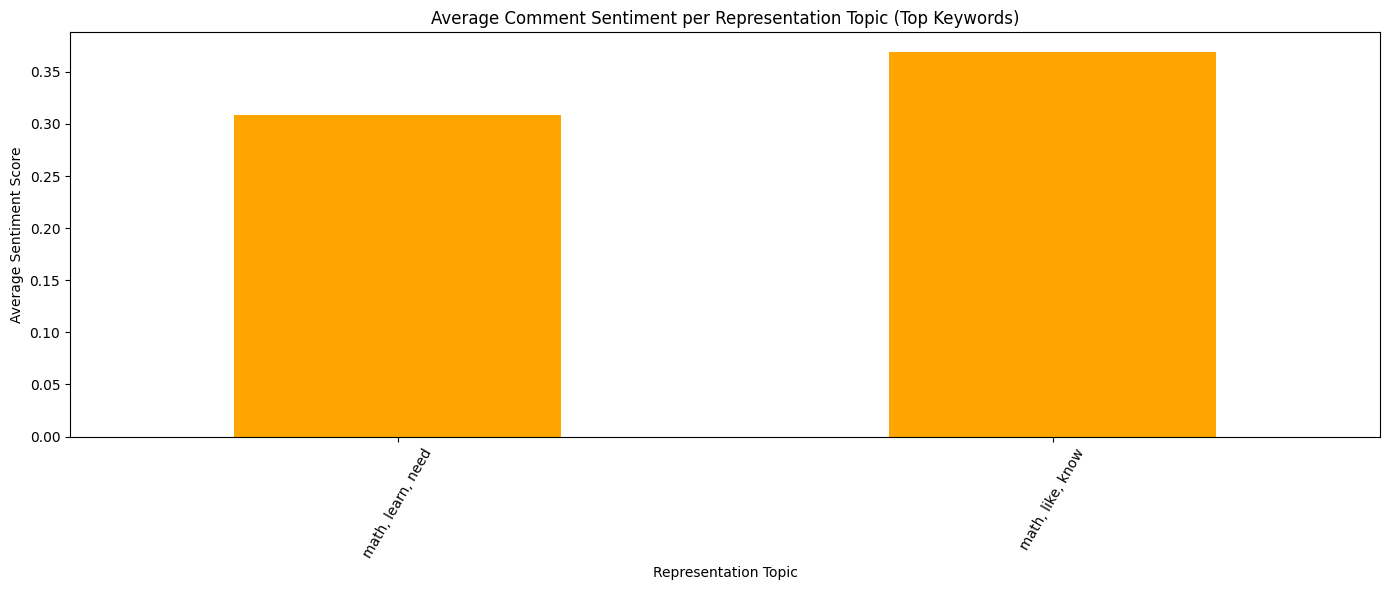

In [117]:
# ✅ Step 1: representation_topic 分组，计算评论的平均情绪
avg_sentiment_by_topic = final_df.groupby("representation_topic")["sentiment_score"].mean()
sorted_sentiment = avg_sentiment_by_topic.sort_values()

# ✅ Step 2: 获取每个 topic 的关键词（用于横轴展示）
topic_labels = {}
for topic_num in sorted_sentiment.index:
    words = topic_model.get_topic(topic_num)  # 使用你已定义的 BERTopic 模型
    if words:
        label = ", ".join([w[0] for w in words[:3]])  # 取前3个关键词
    else:
        label = f"Topic {topic_num}"
    topic_labels[topic_num] = label

# ✅ 替换 index 为关键词
sorted_sentiment.index = [topic_labels[i] for i in sorted_sentiment.index]

# ✅ Step 3: 可视化
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sorted_sentiment.plot(kind="bar", color="orange")
plt.title("Average Comment Sentiment per Representation Topic (Top Keywords)")
plt.xlabel("Representation Topic")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [118]:
print("🔍 实际生成的 representation 主题数：", df["title_topic"].nunique())
print("各主题数量分布：\n", df["title_topic"].value_counts())

print("最终图中实际出现的 topic：")
print(final_df["representation_topic"].value_counts())

🔍 实际生成的 representation 主题数： 100
各主题数量分布：
 title_topic
 0     218
-1     130
 1     111
 2      58
 3      54
      ... 
 94     11
 95     11
 96     10
 97     10
 98     10
Name: count, Length: 100, dtype: int64
最终图中实际出现的 topic：
representation_topic
1    153
0    111
Name: count, dtype: int64
